# Exterior spacetimes for rotating stars by Xanthopoulos
##  Geoff Cope
##  Univeristy of Utah
##  January 7th, 2022

https://aip.scitation.org/doi/abs/10.1063/1.525050

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
t,rho,phi,z,dt,drho,dphi,dz = symbols('t rho phi z dt drho dphi dz')

In [5]:
lambda0 = Function('lambda_0')(rho,z)
lambda0 

In [4]:
lambda1 = Function('lambda_1')(rho,z)
lambda1 

In [6]:
lambda2 = Function('lambda_2')(rho,z)
lambda2 

In [7]:
Omega = Function('Omega')(rho,z)
Omega 

In [9]:
omega0 = Function('omega_0')(rho,z)
omega0 

In [10]:
variables = Matrix( [t,rho,phi,z] )
variables

⎡t⎤
⎢ ⎥
⎢ρ⎥
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎣z⎦

In [11]:
differentials = Matrix( [dt,drho,dphi,dz] ) 
differentials

⎡ dt ⎤
⎢    ⎥
⎢drho⎥
⎢    ⎥
⎢dphi⎥
⎢    ⎥
⎣ dz ⎦

In [12]:
lineElement = expand( lambda0 * dt**2 + 2*lambda1*dt*dphi + lambda2*dphi**2 - Omega**2 * ( drho**2 + dz**2 ) ) 
lineElement

In [13]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡λ₀(ρ, z)      0      λ₁(ρ, z)      0    ⎤
⎢                                        ⎥
⎢            2                           ⎥
⎢   0      -Ω (ρ, z)     0          0    ⎥
⎢                                        ⎥
⎢λ₁(ρ, z)      0      λ₂(ρ, z)      0    ⎥
⎢                                        ⎥
⎢                                 2      ⎥
⎣   0          0         0      -Ω (ρ, z)⎦

In [14]:
import sympy

In [15]:
m = sympy.Array(g)
m

⎡λ₀(ρ, z)      0      λ₁(ρ, z)      0    ⎤
⎢                                        ⎥
⎢            2                           ⎥
⎢   0      -Ω (ρ, z)     0          0    ⎥
⎢                                        ⎥
⎢λ₁(ρ, z)      0      λ₂(ρ, z)      0    ⎥
⎢                                        ⎥
⎢                                 2      ⎥
⎣   0          0         0      -Ω (ρ, z)⎦

In [16]:
from einsteinpy.symbolic import *

In [18]:
syms = sympy.symbols("t rho phi z")
t,rho,phi,z = syms

In [19]:
metric = MetricTensor(m,syms)

In [20]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡⎡                                                            ∂                       ∂     
⎢⎢                                                 - λ₁(ρ, z)⋅──(λ₁(ρ, z)) + λ₂(ρ, z)⋅──(λ₀(
⎢⎢                                                            ∂ρ                      ∂ρ    
⎢⎢                       0                         ─────────────────────────────────────────
⎢⎢                                                          ⎛                      2      ⎞ 
⎢⎢                                                        2⋅⎝λ₀(ρ, z)⋅λ₂(ρ, z) - λ₁ (ρ, z)⎠ 
⎢⎢                                                                                          
⎢⎢           ∂                       ∂                                                      
⎢⎢- λ₁(ρ, z)⋅──(λ₁(ρ, z)) + λ₂(ρ, z)⋅──(λ₀(ρ, z))                                           
⎢⎢           ∂ρ                      ∂ρ                                                     
⎢⎢───────────────────────────────────────────────                     

In [21]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                      2                                   2                                
⎢                     ∂                                   ∂                       ∂         
⎢2⋅λ₀(ρ, z)⋅λ₂(ρ, z)⋅───(λ₀(ρ, z)) + 2⋅λ₀(ρ, z)⋅λ₂(ρ, z)⋅───(λ₀(ρ, z)) + λ₀(ρ, z)⋅──(λ₀(ρ, z
⎢                      2                                   2                      ∂ρ        
⎢                    ∂ρ                                  ∂z                                 
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

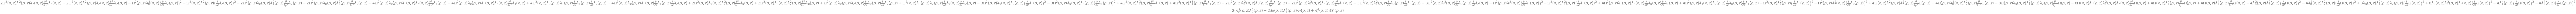

In [23]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [22]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor() 

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [24]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [25]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [27]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡                      2                                   2                                
⎢                     ∂                                   ∂                       ∂         
⎢2⋅λ₀(ρ, z)⋅λ₂(ρ, z)⋅───(λ₀(ρ, z)) + 2⋅λ₀(ρ, z)⋅λ₂(ρ, z)⋅───(λ₀(ρ, z)) + λ₀(ρ, z)⋅──(λ₀(ρ, z
⎢                      2                                   2                      ∂ρ        
⎢                    ∂ρ                                  ∂z                                 
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [47]:
einsteinSimplified = simplify(einst.tensor())
einsteinSimplified

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [29]:
equation2 = Eq( lambda1**2 - lambda0 * lambda2 , rho**2 ) 
equation2

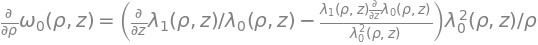

In [30]:
equation3a = Eq( diff(omega0,rho) , (lambda0**2/rho)*diff((lambda1/lambda0),z ) ) 
equation3a

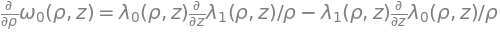

In [35]:
domega0drho = expand(equation3a)
domega0drho

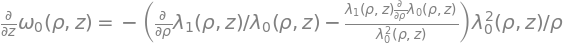

In [31]:
equation3b = Eq( diff(omega0,z) , (-1)*(lambda0**2/rho)*diff((lambda1/lambda0),rho ) ) 
equation3b

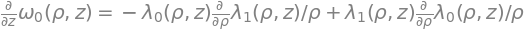

In [36]:
domega0dz = expand(equation3b)
domega0dz

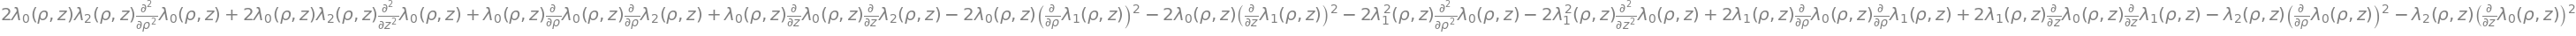

In [46]:
ricciSimplified[0,0].args[3]

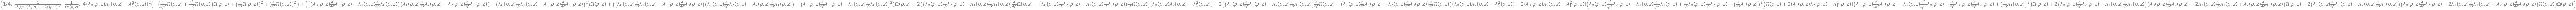

In [48]:
ricciSimplified[1,1].args

In [ ]:
ricciSimplified[2,2].args[3]

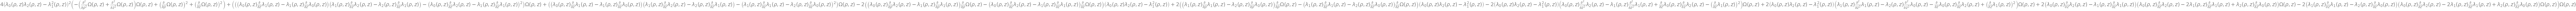

In [55]:
ricciSimplified[3,3].args[3]

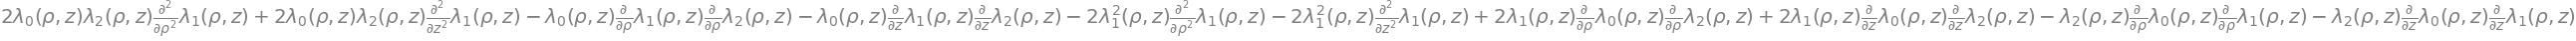

In [53]:
ricciSimplified[2,0].args[3]